In [1]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (12,6)

# Вычислительная математика

## МФТИ, 2018

## Лекция 1. 
* Введение 
* Предмет вычислительной математики
* Машинная арифметика

## Контакты

Чикиткин Александр Викторович, к.ф.-м.н.

Кафедра вычислительной физики МФТИ (603 КПМ)

**Лаборатория математического моделирования нелинейных процессов в газовых средах МФТИ (606 КПМ)**

alexchikitkin@gmail.com

## Общая информация о курсе


Дифференцированный зачет
* Лекции и семинары
* Два письменных задания (**по 0.5 балла**)
* Две контрольные работы (1-я на семинарах, 2-я (итоговая) на лекции) (**по 2.5 балла**)
* 3 задачи на программирование (**по 1 баллу**)
* Посещение семинаров (**1 балл**)


# О чём предмет?
Названия: вычислительная математика, численные методы, numerical analysis, scientific computing.

* *Numerical analysis is the study of algorithms for the problems of continuous mathematics.* (L. N. Trefethen)

* *Вычислительная математика изучает алгоритмы решения задач непрерывной математики.* 

**Алгоритмы** - конечная последовательность операций для получения приближенного решения (числа, вектора и т.п.)

**Непрерывная математика** - решаемые задачи содержать непрерывные переменные ($\mathbb{R}^n$, $\mathbb{C}^n$ ). 

*Алгоритмы решения задач дискретной математики: информатика, теория алгоритмов, комбинаторика (computer science)*

**Четкой границы между этими областями нет!**


## Примеры задач, решаемых численными методами
* Вычисление стандартных функций: $\sqrt{x}$, $sin(x)$, $1/x$
* Вычисление производных и определенных интегралов от функций
* Вычисление корней многочленов и нелинейных функций


* Решение линейных систем. Метод исключения (метод Гаусса) - $\mathcal{O}(N^3)$, $10^6$ неизвестных: > 1 года на ноутбуке.
* Вычисление собственных чисел: $\det (A -\lambda I) = 0$ (никто не ищет корни характеристического многочлена!)


* Минимизация функционала
<p>
* Решение нелинейных ОДУ
* Решение уравнений в частных производных

## Содержание курса

1. Классификация погрешностей, машинная арифметика

2. Вычислительная линейная алгебра

3. Теория приближений

4. Численное дифференцирование

5. Численное интегрирование

6. Методы решения нелинейных уравнений

7. Методы решения ОДУ

8. ~~Методы решения ДУЧП~~

**Даже для использования готовых методов и программ необходимо знание теории численных методов**

## Несколько примеров

## Вычисление производной.

Вычислим производную функции $f$ по приближенной формуле:  

$ \displaystyle f'(x) = \lim_{dx \to 0} \frac{f(x + dx) - f(x)}{dx} \approx \frac{f(x + dx) - f(x)}{dx}$

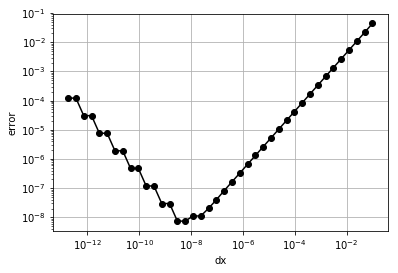

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

f =  lambda x: np.sin(x)
df = lambda x: np.cos(x)
x0 = np.pi/3
n = 40
dx = 1e-1 / 2.0**np.arange(n)
df_appr = (f(x0 + dx) - f(x0)) / dx
plt.loglog(dx, np.abs(df_appr - df(x0)), 'ko-')
plt.xlabel('dx')
plt.ylabel('error')
plt.grid('On')

## Плохая матрица.

$A(i,j) = 1/ (i + j - 1)$

In [3]:
import numpy as np

n = 20
A = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A[i,j] = 1 / (i + j  + 1)
# A = np.random.rand(n,n) # Попробуйте эту матрицу
x = np.ones(n)
b = A @ x
y = np.linalg.solve(A, b)
print(y - x)

[-1.31375548e-06  2.00261011e-04 -7.47491901e-03  1.18086756e-01
 -9.62312335e-01  4.32542601e+00 -1.00859495e+01  5.85155021e+00
  2.84777433e+01 -7.19871414e+01  5.10950800e+01  3.42564547e+01
 -6.23474773e+01  5.69842624e+00  1.48195473e+01  5.58564049e+00
  2.65711905e+01 -6.83246863e+01  4.84579442e+01 -1.15422477e+01]


##  Неверная интерполяция.

Пример запуска стандартной функции в Matlab. Многочлен не проходит через точки интерполяции.

<center> <img src="bad_interp.png" alt="Drawing" style="width: 1000px;"/></center>

## Современные возможности

* Высокая производительность компьютеров

* Наличие языков программирования высокого уровня

* Готовые вычислительные библиотеки

**Всё это позволяет решать сложные задачи в короткие сроки **

 # <center> Пример исследовательской задачи </center>

<center> Распределение температуры в пластине </center>

<center> <img src="plate_heat.png" alt="Drawing" style="width: 500px;"/></center>


## <center> Математическая модель </center>

* Стационарное распределение температуры $u(x,y)$ в однородной среде удовлетворяет уравнению Лапласа:
$$
\Delta u = u_{xx} +u_{yy} = 0
$$
* В случае переменного коэффициента теплопроводности:
$$
\nabla(k(x,y)\nabla u) = 0
$$
* Добавив граничные условия, получаем постановку задачи:
$$
\begin{align}
& u_{xx} + u_{yy} = 0 ,\, (x,y) \in [0, 1]\times[0, 1] \\
& u(0,y) = T_{L}\\
& u(x,0) = T_{L}\\
& u(1,y) = ... \\
& u(x,1) = ...
\end{align}
$$


## 3. Постановка "непрерывной" задачи

Теперь можно сформулировать описанную задачу о нагреве пластины в терминах математической модели, как краевую задачу для уравнения в частных производных эллиптического типа (уравнения Лапласа): 

найти функцию двух переменных $u(x,y)$ которая удовлетворяет уравнению и граничным условиям:
$$
u_{xx} + u_{yy} = 0 ,\, (x,y) \in [0, 1]\times[0, 1]
$$
$$ 
u(0,y) = T_{cold}
$$
$$
u(x,0) = T_{cold}
$$
$$ 
u(1,y) = u_1(y)
$$
$$ 
u(x,1) = u_2(y)
$$

Это -- точная *дифференциальная постановка* задачи. Аналитически решаются лишь самые простые модельные задачи для дифференциальных уравнений в частных производных (ДУЧП), поэтому для решения прикладных задач необходимо использовать какой-либо *численный метод*: метод, который позволяет решить задачу приближённо и оценить *ошибку* приближения.

## Численный метод 

Один из распространённых способов дискретизации - замена производных *конечными разностями*:

* 

$$f'(x) \approx \frac{f(x +h) -f(x)}{h} \mbox{ или } \frac{f(x+h) - f(x-h)}{2h}$$ 

* Несложно по аналогии получить конечно-разностное приближение второй производной: 

$$f''(x) \approx \frac{f(x+h) - 2 f(x) +f(x-h)}{h^2}$$

## Численный метод 

* Введем сетку: $x_i = i h, y_j = j h, i = 0,\ldots, N, \, j = 0, \ldots, N, h = 1/N$ 

* Дискретизация уравнения
$$
\frac{u_{i-1,j} - 2 u_{i,j} + u_{i+1,j}}{h^2} + \frac{u_{i,j-1} - 2 u_{i,j} + u_{i,j+1}}{h^2} = 0,\, i,j = 1,\ldots, N-1 \\
u_{i-1,j} + u_{i+1,j} + u_{i,j-1} + u_{i,j+1}- 4 u_{i,j} = 0, \, i,j = 1,\ldots, N-1
$$

К этим уравнением добавляются г.у.: $ u_{0,j} = T_{L},\; j = 0,\ldots, N $ и т.п.


Разностная сетка и узлы, которые входят в каждое уравнение изображены на рисунке 

<center><img src="stencil.png" alt="Drawing" style="width: 300px;" align="center"></center>


## Решение линейной системы уравнений

* уравнения образуют линейную систему из $(N-1)^2$ уравнений


* матрица системы - *разреженная*: большинство элементов равны нулю 


* *наивное* применение метода Гаусса: $\mathcal{O}(n^3) = \mathcal{O}(N^6)$ операций. Для $N = 10^3$ - около года на ноутбуке


* обычно применяют *итерационные методы*


* Метод Якоби: обновление значений $u_{ij}$ по формуле:
$$
u^{k+1}_{ij} = (u^k_{i+1,j} + u^k_{i-1,j}+u^k_{i,j+1}+u^k_{i,j-1})/4
$$
Индексом $k$ обозначен номер приближения (итерации). В начале можно задать $u_{ij} = 0$. 

В основном, для решения подобных задач используются *итерационные методы* (*методы последовательных приближений*).

Один из таких методов - метод Якоби. Он заключается в последовательном обновлении значений $u_{ij}$ по формуле:
$$
u^{k+1}_{ij} = (u^k_{i+1,j} + u^k_{i-1,j}+u^k_{i,j+1}+u^k_{i,j-1})/4
$$
Индексом $k$ обозначен номер приближения (итерации). В начале можно задать $u_{ij} = 0$. 


В курсе будет доказано, что метод Якоби сходится, т.е. что последовательность $u^k_{ij}$ в каждой точке сходится к точному решению линейной системы.

**Обратите внимание**: решая приближённо дифференциальное уравнение мы получаем линейную систему, которую тоже вынуждены решать приближённо! Ясно, что важно правильно оценить влияние каждого из приближений на погрешность результата.

## 5. Реализация метода

In [4]:
# Решение уравнения Лапласа в 2D
%matplotlib inline 
import numpy as np 

def solve_laplace(N, T1, T2, tol = 1e-3, max_it = 1e+4):
    h = 1.0/N
    # initialize 2-d solution array
    u = np.zeros((N+1, N+1))
    u_new = np.zeros((N+1, N+1))

    x = np.arange(N+1) * h
    y = np.arange(N+1) * h
    # set b.c.
    u_new[::,0] = T1
    u_new[0,::] = T1  
    log = np.logical_or(np.less_equal(x,0.4),np.greater_equal(x,0.6))
    u_new[::,N] = T1 * log + T2 * (np.logical_not(log))
    log = np.logical_or(np.less_equal(y,0.2),np.greater_equal(y,0.6))
    u_new[N,::] = T1 * log + T2 * (np.logical_not(log))
    it = 0
    delta = 1e+5
    while True:
        it = it + 1
        u = np.copy(u_new)
        for i in range(1,N):
            for j in range(1,N):
                u_new[i,j] = 0.25 * (u[i+1,j] + u[i-1,j] + u[i,j-1] + u[i,j+1])
        delta = np.amax(np.fabs(u_new - u), axis = None) / np.amax(u_new)
        if ((delta < tol) or (it > max_it)):
            break
    print("Number of iterations:", it)
    print("Delta = ", delta)
    print("Temperature at center = ", u_new[N//2, N//2])
    return u_new, x, y

Number of iterations: 3896
Delta =  9.9973795738606e-07
Temperature at center =  342.1051098575059


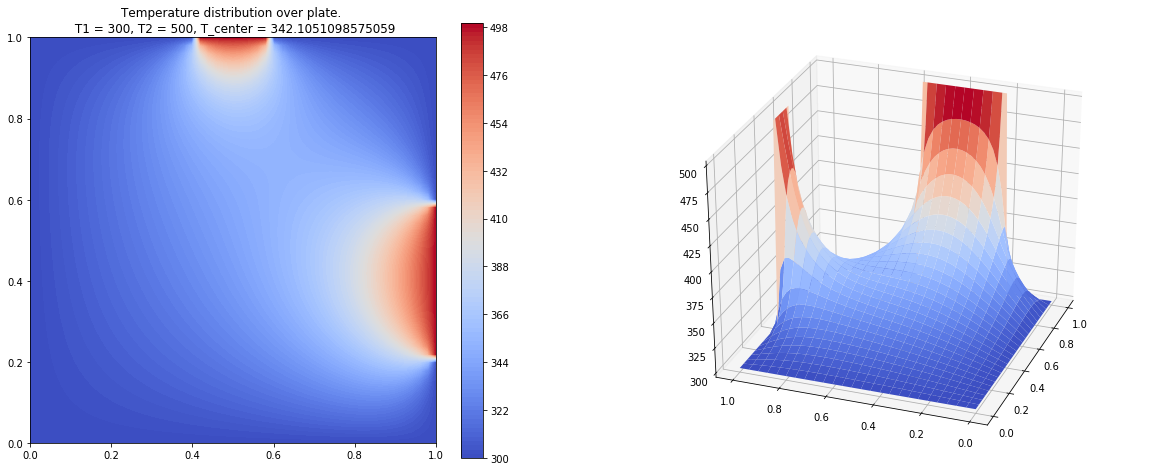

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
T1 = 300
T2 = 500
u, x, y = solve_laplace(N = 50, T1 = T1, T2 = T2, tol = 1e-6, max_it=1e+4)
# Draw figures
X, Y = np.meshgrid(x, y)
u = u.transpose()
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1, 2, 1)
cf = ax1.contourf(X, Y, u, 100, cmap = 'coolwarm')
ax1.set_title('Temperature distribution over plate. \n T1 = '  + str(T1) +
          ', T2 = ' + str(T2) + ', T_center = ' +  str(u[u.shape[0]//2,u.shape[0]//2]))
fig.colorbar(cf, ax=ax1)
ax1.set_aspect('equal')
# plt.savefig("colormap.png", dpi = 300, format = "png")
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.view_init(30, 200)
surf = ax2.plot_surface(X, Y, u, cstride = 2, rstride=2, cmap ='coolwarm', lw=0, antialiased=True)

## Важные особенности

* Дискретизация: переход от непрерывных функций/операторов к дискретным

* Линейные системы с особой структурой

* Перекрестное влияние ошибок разных *подметодов*

# Машинная арифметика

В численных методах есть 3 основных типа ошибок:

1. Ошибки входных данных 
2. Ошибки метода
3. **Ошибки округления** 
4. ~~Ошибки модели~~

## Машинная арифметика. Числа с плавающей точкой

* Число $-3.1416$ можно записать в *математической нотации* так

<img src="floating_point.png" alt="Drawing" style="width: 500px;">

* Подобное представление *с плавающей точкой* (*floating point*) используется для хранения чисел в компьютере. Основание обычно равно $2$.

* Число с плавающей точкой называется *нормализованным*, если старший разряд его мантиссы отличен от нуля. 

* Например, число $0.10101_2 \times 2^3$ нормализовано, а число $0.010101_2 \times 2^4$ нет. 
* Обычно числа нормализуют т.к. 
    1. Каждое ненулевое число имеет единственное представление в виде строки битов
    2. Cтарший бит мантиссы можно не хранить, т.к. он всегда равен 1



## Машинная арифметика. Ошибка округления

* Одна из самых важных величин - *относительная ошибка представления* действительного числа в виде машинного числа. 

* Будем считать, что действительное число округляется до *ближайшего* числа с заданным конечным числом разрядов. 

* Например, число $0.31416 \times 10^1$ имеет 5 десятичных разрядов, поэтому за счёт округления мы изменили число не больше чем на $0.5 \times 10^{-5} \times 10^1 = 0.5 \times 10^{-4}$. Тогда относительную ошибку можно оценкить так:

$$ 
\frac{\vert x - 0.31416 \times 10^1\vert}{0.31416 \times 10^1} \le \frac{0.5 \times 10^{-4}}{0.31416 \times 10^1} \approx 0.16 \times 10^{-4}
$$

## Машинная арифметика. Ошибка округления

* Максимум относительной ошибки представления реализуется в числе $0.10000 \times 10^1$ - наиболее точное пятиразрядное представление $\forall x \in (0.999995, 1.00005)$. 
* Относительная ошибка для этого числа оценивается величиной $0.5 \times 10^{-4}$. В общем случае, для $p$ разрядной мантиссы и основания $b$ *максимальная относительная ошибка* равна $0.5 \times b^{-p+1}$. 

* Эта величина равна половине расстояния между числом $1$ и ближайшим бОльшим числом с плавающей точкой, т.е. числом $1 + b^{-p+1}$. 

* Эту же величину можно определить как максимальное число $eps$, такое что в машинной арифметике $1 + eps = 1$. 

* Число $eps$ называют *машинным эпсилон*

**Нужно обратить внимание** на то, что в языках программирования и программных библиотеках *машинным эпсилон* часто называется число, вдвое большее, т.е. минимальное число $eps$, такое что $1 + eps \ne 1$

## IEEE-стандарт. Одинарная точность
* В настоящее время почти общепринятым является [IEEE-стандарт](https://en.wikipedia.org/wiki/IEEE_floating_point) двоичной арифметики. 
* IEEE арифметика поддерживает два типа чисел с плавающей точкой: *числа одинарной точности* (32 бита) и *числа двойной точности* (64 бита).

<img src="single_precision.png" alt="Drawing" style="width: 800px;">

* Пусть в представлении IEEE-числа одинарной точности $s,e$ и $f < 1$ соответствено: 1-битовый знак, 8-битовый показатель и 23-битовая мантисса. Тогда само число равно

    $a = (-1)^s \times 2^{e-127} \times (1+f)$
    

* **В показателе стоит $e - 127$ т.к. используется [сдвиг экспоненты](https://en.wikipedia.org/wiki/Exponent_bias).**

* $1+f$ возникает за счёт нормализации: старший бит, равный $1$, не хранится, длина мантиссы $p=24$. Максимальная относительная погрешность представления равна $0.5 \times 2^{-24 + 1} = 2^{-24} \approx 6 \times 10^{-8}$.

## IEEE-стандарт. Двойная точность

<img src="double_precision.png" alt="Drawing" style="width: 800px;">

* Для двойной точности:

    $a = (-1)^s \times 2^{e-1023} \times (1+f)$


* Максимальная относительная ошибка представления равна $0.5 \times 2^{-53 + 1} = 2^{-53} \approx 10^{-16}$, а границами являются $2^{-1022}$ и $2^{1023} \times (2-2^{-52}) \approx 2^{1024}$, приблизительно $10^{-308}$ и $10^{308}$.


* Одинарная точность позволяет хранить нормализованные числа от $2^{-126}$ (*порог машинного нуля, underflow*), до $2^{127} \times (2 - 2^{-23})$ (*порог переполнения, overflow*), $\approx [10^{-38}, 10^{38}]$.

## Анализ влияния ошибок округления

Пусть символ $*$ обозначает одну из четырёх бинарных операций $+, -, \times , /$.   
Если точный результат вычисления $a*b$ нельзя представить  как число с плавающей точкой, то, прежде чем записать его в память или регистр, нужно приблизить его каким-то близко расположенным числом с плавающей точкой.  
Это приближение будем обозначать $fl(a*b)$. 

* Разность $[a*b - fl(a*b)]$ называется *погрешностью округления*. 

* Если $fl(a*b)$ всегда является ближайшим числом с плавающей точкой к числу $a*b$, то говорят, что арифметика *округляет правильно*. **IEEE-ариметика округляет правильно.** 

## Анализ влияния ошибок округления

* Предположим, что используемая арифметика округляет правильно и число $a*b$ не выходит за пределы области допустимых показателей (иначе получился бы *машинный нуль* или *переполнение*). Тогда можно записать $fl(a*b)$ как

    * $fl(a*b) = a*b (1 + \varepsilon)$

    где $|\varepsilon| \le eps$.

* Поскольку округление производится с наивысшей возможной точностью, то $eps$ равно максимальной относительной ошибке представления $0.5 \times 2^{-p+1} = 2^{-p}$. 

* IEEE-арифметика обеспечивает также $fl(\sqrt{a}) = \sqrt{a}(1+\varepsilon)$, где $|\varepsilon| \le eps$. Эти соотношения определяют наиболее распространённую модель анализа погрешностей округлений.

## Обратная устойчивость
 * Пусть $alg(x)$ результат вычисления $f(x)$ с помощью некоторого алгоритма
 * $alg(x)$ называется *обратно устойчивым*, если $\forall x$ $\exists$ $\delta x$:
 $$
 alg(x) = f(x + \delta x)
 $$
 * В этом случае можно оценить ошибку:
 $$
\lvert alg(x) - f(x)\rvert = \lvert f(x+\delta x) - f(x)\rvert \approx \lvert f'(x)\rvert \lvert \delta x \rvert
 $$
 * В более общем случае аналогом $\lvert f' \rvert$ является *число обусловленности*

## Пример: вычитание близких чисел.

* Операция имеет такую же оценку относительной ошибки как и остальные операции: $\le eps$. 


* Большая ошибка может возникать из-за того, что предварительно близкие числа округляются:

    $\tilde{y_1} = fl(y_1) = (1+\varepsilon_1) y_1$, $\tilde{y_2} = fl(y_2) = (1+\varepsilon_2) y_2$

    $\displaystyle fl(\tilde{y_1} - \tilde{y_2}) = (1 + \varepsilon_3) (\tilde{y_1} - \tilde{y_2}) = (y_1 - y_2) \left(1 + \varepsilon_3 + \underline{\frac{\varepsilon_1 y_1 - \varepsilon_2 y_2}{y_1 - y_2} (1 + \varepsilon_3)}\right)$

Подчёркнутое слагаемое может быть очень большим, если разность $y_1 - y_2$ мала.